### Student Name: Roshnaey Khattak 

In [1]:
#import the required modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

### Step 1 – Load the data and extract the features

In [2]:
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
            'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = '' #TODO: provide the file path or URL to the dataset `trip_data.csv`
df = pd.read_csv("/Users/roshnaey/Desktop/trip_data.csv", usecols=features)

#after the data is loaded in the dataframe, you would normally perform preliminary analysis to verify the data.
# For example, using df.head() and df.describe() but you can skip that step for now. 

#assign the input features to a variable called 'X' and the labels in a variable called 'y'
X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge
count,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000,171941.000000
mean,1.842190,1.045731,103.152558,133.958707,1.306262,2.359276,11.121357,0.448590,0.494548,0.077659,0.298234,15.148219,1.010719,0.600055
std,0.364564,0.424170,68.253994,77.035977,0.965556,1.759422,6.393361,0.632314,0.052529,0.690598,0.022948,8.329871,0.102976,1.135714
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,0.000000
25%,2.000000,1.000000,52.000000,66.000000,1.000000,1.080000,6.500000,0.000000,0.500000,0.000000,0.300000,9.360000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,137.000000,1.000000,1.800000,9.500000,0.500000,0.500000,0.000000,0.300000,12.880000,1.000000,0.000000
75%,2.000000,1.000000,145.000000,203.000000,1.000000,3.100000,14.000000,0.500000,0.500000,0.000000,0.300000,18.660000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,9.000000,8.430000,180.000000,4.500000,3.550000,22.740000,0.300000,452.800000,2.000000,2.750000


### Step 2 – Split the data
Hint: use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from scikit-learn.

In [3]:
seed = 1234 #TODO: provide an integer for the random number generator.

#Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3 , #TODO: provide the test_size (refer to the instructions for the assignment)
                                                    random_state = seed, #seed the random generator for reproducibilty
                                                    stratify = y #TODO: provide the variable
                                                   )

#Note: X_train and y_train are the input features and labels for the training set respectively.
#Note: X_test and y_test are the input features and labels for the test set respectively.

### Step 3 - Create the decision tree
Hint: use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) in scikit-learn. Here is an example on how to use build a [decision tree for classification](https://scikit-learn.org/stable/modules/tree.html#classification).

In [4]:
#Instantiate the Decision Tree Classifier object 
dt_classifier = DecisionTreeClassifier(criterion= 'gini', #TODO: choose either 'gini' or 'entropy'
                                       max_depth= 5 #TODO: set the value (refer to the instructions above)
                                      )

#TODO: Train Decision Tree Classifier using the `fit` method
regression_1 = DecisionTreeClassifier(max_depth =5)
regression_1.fit(X_train, y_train)

#TODO: Make predictions with `X_test` and store the result in a variable called `y_pred`
y_pred1 = regression_1.predict(X_test)

#### Evaluate the prediction accuracy
Hint: use the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) to determine how many observations were classified correctly. Use `y_test` and `y_pred` for the calculations.

In [5]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.6667119012077622

In [6]:
## Since the value for the accuracy score for the max depth = 5 is below 0.8 (~0.662137) I'll be running the
## code again with a larger max_depth

In [7]:
#TODO: Train Decision Tree Classifier using the `fit` method with Max_Depth different than 5
regression_2 = DecisionTreeClassifier(max_depth =9)
regression_2.fit(X, y)

#TODO: Make predictions with `X_test` and store the result in a variable called `y_pred`
y_pred2 = regression_2.predict(X_test)

#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.8114301223271233

### Step 4 - Visualize the decision tree
Hint: use the export_graphviz method. An [example is shown here](https://scikit-learn.org/stable/modules/tree.html#classification). Alternatively, you may use your preferred library/tool to display the tree.

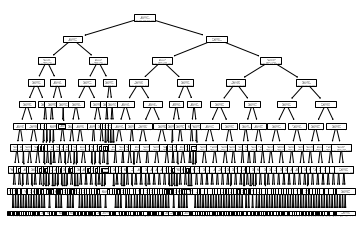

In [10]:
#TODO: Display the decision tree
import matplotlib
from sklearn import tree
decisiontree_plot = tree.plot_tree(regression_2)

### Summarize the results using one paragraph (2-5 sentences)

In [ ]:
## Obviously, the above decision tree is very difficult to navigate 
## and understand. This is due to the high max-depth value.
## If the max-depth value were lowered back to 5, the visualization 
## is much easier to read, but it is less accurate. For the sake of
## practicality, the easier decision tree to follow would be preferred
## over the most accurate but difficult to use tree. 
## For this reason, if I were reporting to a taxi service or 
## organization, I would use a model that is easier for them to 
## understand even if it jeopardizes accuracy within a reasonable limit.